<a href="https://colab.research.google.com/github/antonisxylas/Homework-2/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

#Import the libraries

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [ ]:
#Directory to store raw data files
os.makedirs("CovidRecovery/RawData", exist_ok=True)
#Directory to store output files
os.makedirs("CovidRecovery/output", exist_ok=True)
#Directory to store code files
os.makedirs("CovidRecovery/code", exist_ok=True)
#Directory to store CSV file
os.makedirs("CovidRecovey/CSV", exist_ok=True)

We will leverage the PPP data sourced from the US Small Business Administration, complemented by job postings data extracted from Opportunity Insights. Additionally, we will integrate the most recent population estimates of US counties obtained from the US Census Bureau. This comprehensive approach will enable us to analyze and understand various socio-economic aspects at the county level

#Download and load all the PPP data from the US Small Business Administration website

In [ ]:
urls =[ 'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/738e639c-1fbf-4e16-beb0-a223831011e8/download/public_150k_plus_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/a7fa66f4-fd2e-433c-8ef9-59780ef60ae5/download/public_up_to_150k_1_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/7d2308a8-0ac1-48a8-b21b-f9eb373ac417/download/public_up_to_150k_2_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/5158aae1-066d-4d01-a226-e44ecc9bdda7/download/public_up_to_150k_3_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/d888bab1-da5b-46f2-bed2-a052d48af246/download/public_up_to_150k_4_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/ee12d751-2bb4-4343-8330-32311ae4e7c7/download/public_up_to_150k_5_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/27b874d9-a059-4296-bb74-374294c48616/download/public_up_to_150k_6_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/434efae0-016a-48da-92dc-c6f113d827c1/download/public_up_to_150k_7_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/4fc8e993-c3b9-4eb2-b9bb-dfbde9b1fb6f/download/public_up_to_150k_8_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/7f9c6867-2b55-472e-a4f3-fd0f5f27f790/download/public_up_to_150k_9_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/a8f2c8b2-facb-4e97-ad5f-7c8736c8b4b6/download/public_up_to_150k_10_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/6f9787a3-afd6-45b2-b78e-ad0dc097c1c3/download/public_up_to_150k_11_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/6f9787a3-afd6-45b2-b78e-ad0dc097c1c3/download/public_up_to_150k_11_230930.csv']

In [ ]:
# Loop through each URL, enumerate for indexing starting from 1
for i, url in enumerate(urls, start=1):
    # Create a filename for each dataset
    filename = f'ppp_dataset{i}.csv'
    # Define the file path where the dataset will be saved
    filepath = os.path.join('CovidRecovery', 'RawData', filename)

    # Make a GET request to the URL to download the dataset
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Open the file in write-binary mode and write the content
        with open(filepath, 'wb') as f:
            f.write(response.content)
        # Print success message
        print(f'Dataset {i} downloaded and saved successfully.')
    else:
        # Print error message if the download failed
        print(f'Failed to download dataset {i}. Status code: {response.status_code}')

path = 'CovidRecovery/RawData/data.csv'


Dataset 1 downloaded and saved successfully.
Dataset 2 downloaded and saved successfully.
Dataset 3 downloaded and saved successfully.
Dataset 4 downloaded and saved successfully.
Dataset 5 downloaded and saved successfully.
Dataset 6 downloaded and saved successfully.
Dataset 7 downloaded and saved successfully.
Dataset 8 downloaded and saved successfully.
Dataset 9 downloaded and saved successfully.
Dataset 10 downloaded and saved successfully.
Dataset 11 downloaded and saved successfully.
Dataset 12 downloaded and saved successfully.
Dataset 13 downloaded and saved successfully.


In [ ]:
## List of filenames based on the number of datasets
filenames = [f'ppp_dataset{i}.csv' for i in range(1, 14)]

# Dictionary to hold the DataFrames
datasets = {}

# Read each CSV file into a pandas DataFrame
for filename in filenames:
    filepath = os.path.join('CovidRecovery', 'RawData', filename)
    if os.path.exists(filepath):
        datasets[filename] = pd.read_csv(filepath)
# Check if any datasets were loaded
if datasets:
    # Get the filename of the first dataset
    first_dataset_filename = filenames[0]
    # Print the first few rows of the first dataset
    print(datasets[first_dataset_filename].head())
else:
    print("No datasets were loaded.")

<ipython-input-5-f528c644ad10>:11: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  datasets[filename] = pd.read_csv(filepath)
<ipython-input-5-f528c644ad10>:11: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  datasets[filename] = pd.read_csv(filepath)
<ipython-input-5-f528c644ad10>:11: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  datasets[filename] = pd.read_csv(filepath)


   LoanNumber DateApproved  SBAOfficeCode ProcessingMethod  \
0  9547507704   05/01/2020            464              PPP   
1  9777677704   05/01/2020            464              PPP   
2  5791407702   05/01/2020           1013              PPP   
3  6223567700   05/01/2020            920              PPP   
4  9662437702   05/01/2020            101              PPP   

               BorrowerName        BorrowerAddress      BorrowerCity  \
0     SUMTER COATINGS, INC.  2410 Highway 15 South            Sumter   
1     PLEASANT PLACES, INC.    7684 Southrail Road  North Charleston   
2   BOYER CHILDREN'S CLINIC       1850 BOYER AVE E           SEATTLE   
3  KIRTLEY CONSTRUCTION INC   1661 MARTIN RANCH RD    SAN BERNARDINO   
4              AERO BOX LLC                    NaN               NaN   

  BorrowerState BorrowerZip LoanStatusDate  ...             BusinessType  \
0           NaN  29150-9662     12/18/2020  ...              Corporation   
1           NaN  29420-9000     09/28/2021

In [ ]:
# Check for NaNs in each dataset and clean the data if necessary
for filename, df in datasets.items():
    # Check for NaNs
    if df.isna().sum().sum() > 0:
        print(f'{filename} contains NaN values. Cleaning data...')
        # Remove rows with NaNs
        df_cleaned = df.dropna()
        print(f'After cleaning, {filename} has {len(df_cleaned)} rows remaining.')
        datasets[filename] = df_cleaned
    else:
        print(f'{filename} does not contain NaN values.')

ppp_dataset1.csv contains NaN values. Cleaning data...
After cleaning, ppp_dataset1.csv has 1 rows remaining.
ppp_dataset2.csv contains NaN values. Cleaning data...
After cleaning, ppp_dataset2.csv has 0 rows remaining.
ppp_dataset3.csv contains NaN values. Cleaning data...
After cleaning, ppp_dataset3.csv has 0 rows remaining.
ppp_dataset4.csv contains NaN values. Cleaning data...
After cleaning, ppp_dataset4.csv has 0 rows remaining.
ppp_dataset5.csv contains NaN values. Cleaning data...
After cleaning, ppp_dataset5.csv has 0 rows remaining.
ppp_dataset6.csv contains NaN values. Cleaning data...
After cleaning, ppp_dataset6.csv has 0 rows remaining.
ppp_dataset7.csv contains NaN values. Cleaning data...
After cleaning, ppp_dataset7.csv has 0 rows remaining.
ppp_dataset8.csv contains NaN values. Cleaning data...
After cleaning, ppp_dataset8.csv has 0 rows remaining.
ppp_dataset9.csv contains NaN values. Cleaning data...
After cleaning, ppp_dataset9.csv has 0 rows remaining.
ppp_datase

In [ ]:
# List of filenames based on the number of datasets
filenames = [f'ppp_dataset{i}.csv' for i in range(1, 14)]

# List to store sampled DataFrames
sampled_dfs = []

# Read a sample from each dataset and append to the list
for filename in filenames:
    filepath = os.path.join('CovidRecovery', 'RawData', filename)
    df = pd.read_csv(filepath)
    sampled_dfs.append(df.sample(frac=0.1, random_state=42))

# Concatenate all sampled DataFrames into one
combined_df = pd.concat(sampled_dfs, ignore_index=True)

<ipython-input-7-661cd1f91a52>:10: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
<ipython-input-7-661cd1f91a52>:10: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
<ipython-input-7-661cd1f91a52>:10: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


In [ ]:
# Define the columns to keep
keep_columns = [
    'DateApproved','BorrowerState', 'InitialApprovalAmount','ServicingLenderState','JobsReported',
    'CurrentApprovalAmount','BusinessType', 'Race', 'Ethnicity', 'Gender', 'Veteran']

# Define the data types for each column
dtype_dict = {
    'DateApproved':'string',
    'BorrowerState': 'string',
    'InitialApprovalAmount': 'float64',
    'CurrentApprovalAmount': 'float64',
    'ServicingLenderState': 'string',
    'JobsReported': 'float64',
    'BusinessType': 'string',
    'Race': 'string',
    'Ethnicity': 'string',
    'Gender': 'string',
    'Veteran': 'string',
}
# Load the dataset with specified data types
p_d = {}
for i in range (1,13):
  p_d[i] = pd.read_csv('CovidRecovery/RawData/'f'ppp_dataset{i}.csv', usecols=keep_columns, dtype=dtype_dict)
  p_d[i]['DateApproved'] = pd.to_datetime(p_d[i]['DateApproved'], format='%m/%d/%Y')

In [ ]:
pop = pd.DataFrame(columns=keep_columns)
for i in range(1,13):
  pop = pd.concat([pop,p_d[i]],ignore_index= True)

#Load job postings dataset from the Opportunity

In [ ]:
# Define the URL
url = 'https://raw.githubusercontent.com/OpportunityInsights/EconomicTracker/main/data/Job%20Postings%20-%20State%20-%20Weekly.csv'


# Define the filename and filepath
filename = f'job.csv'
filepath = os.path.join('CovidRecovery', 'RawData', filename)

# Download the file
response = requests.get(url)
if response.status_code == 200:
    with open(filepath, 'wb') as f:
        f.write(response.content)
    print(f'job  downloaded and saved successfully.')
else:
    print(f'Failed to download job. Status code: {response.status_code}')

filepath = 'CovidRecovery/RawData/job.csv'

job_data = pd.read_csv(filepath)


job  downloaded and saved successfully.


#Load the the latest population dataset of US Counties from US Cencus Bureau.

In [ ]:
# Define the URL
url = 'https://www2.census.gov/programs-surveys/popest/datasets/2020-2023/counties/totals/co-est2023-alldata.csv'

# Define the filename and filepath
filename = f'Population_Estimates.csv'
filepath = os.path.join('CovidRecovery', 'RawData', filename)

# Download the file
response = requests.get(url)
if response.status_code == 200:
    with open(filepath, 'wb') as f:
        f.write(response.content)
    print('Population Estimates downloaded and saved successfully.')
else:
    print(f'Failed to download Population Estimates. Status code: {response.status_code}')

# Read the CSV file into a DataFrame
df_population = pd.read_csv(filepath, encoding='latin1')

# Keep only the specified columns
df_population = df_population[['STATE', 'POPESTIMATE2020']]

# Define the data types for each column
dtype_dict1 = {
    'STATE': 'int64',
    'POPESTIMATE2020': 'int64'
    }

# Convert data types
df_population = df_population.astype(dtype_dict1)

# Check for missing values
missing_values = df_population.isnull().sum().sum()
print(f"Number of missing values in the Population Estimates dataset: {missing_values}")


Population Estimates downloaded and saved successfully.
Number of missing values in the Population Estimates dataset: 0


#Exploratory Data Analysis

In [ ]:
pop_sample = pop.sample(frac = 0.02)

NameError: name 'pop' is not defined

<ipython-input-13-52b230169390>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='STATE', y='POPESTIMATE2020', data=df_population, ci=None, palette='pastel')  # Using 'pastel' palette for softer colors
<ipython-input-13-52b230169390>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='STATE', y='POPESTIMATE2020', data=df_population, ci=None, palette='pastel')  # Using 'pastel' palette for softer colors


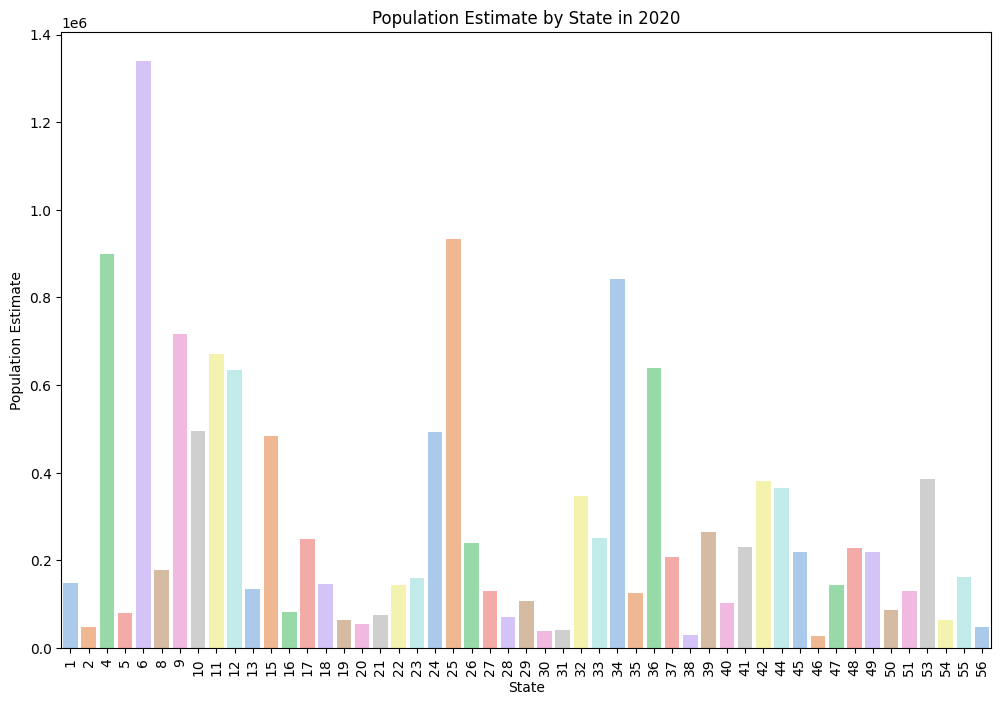

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE', y='POPESTIMATE2020', data=df_population, ci=None, palette='pastel')  # Using 'pastel' palette for softer colors
plt.title('Population Estimate by State in 2020')
plt.xlabel('State')
plt.ylabel('Population Estimate')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Total number of loans and total forgiveness amount
total_loans = combined_df['LoanNumber'].count()
total_forgiveness_amount = combined_df['ForgivenessAmount'].sum()

print(f'Total Loans: {total_loans}')
print(f'Total Forgiveness Amount: {total_forgiveness_amount}')

Total Loans: 1176852
Total Forgiveness Amount: 76710640470.02002


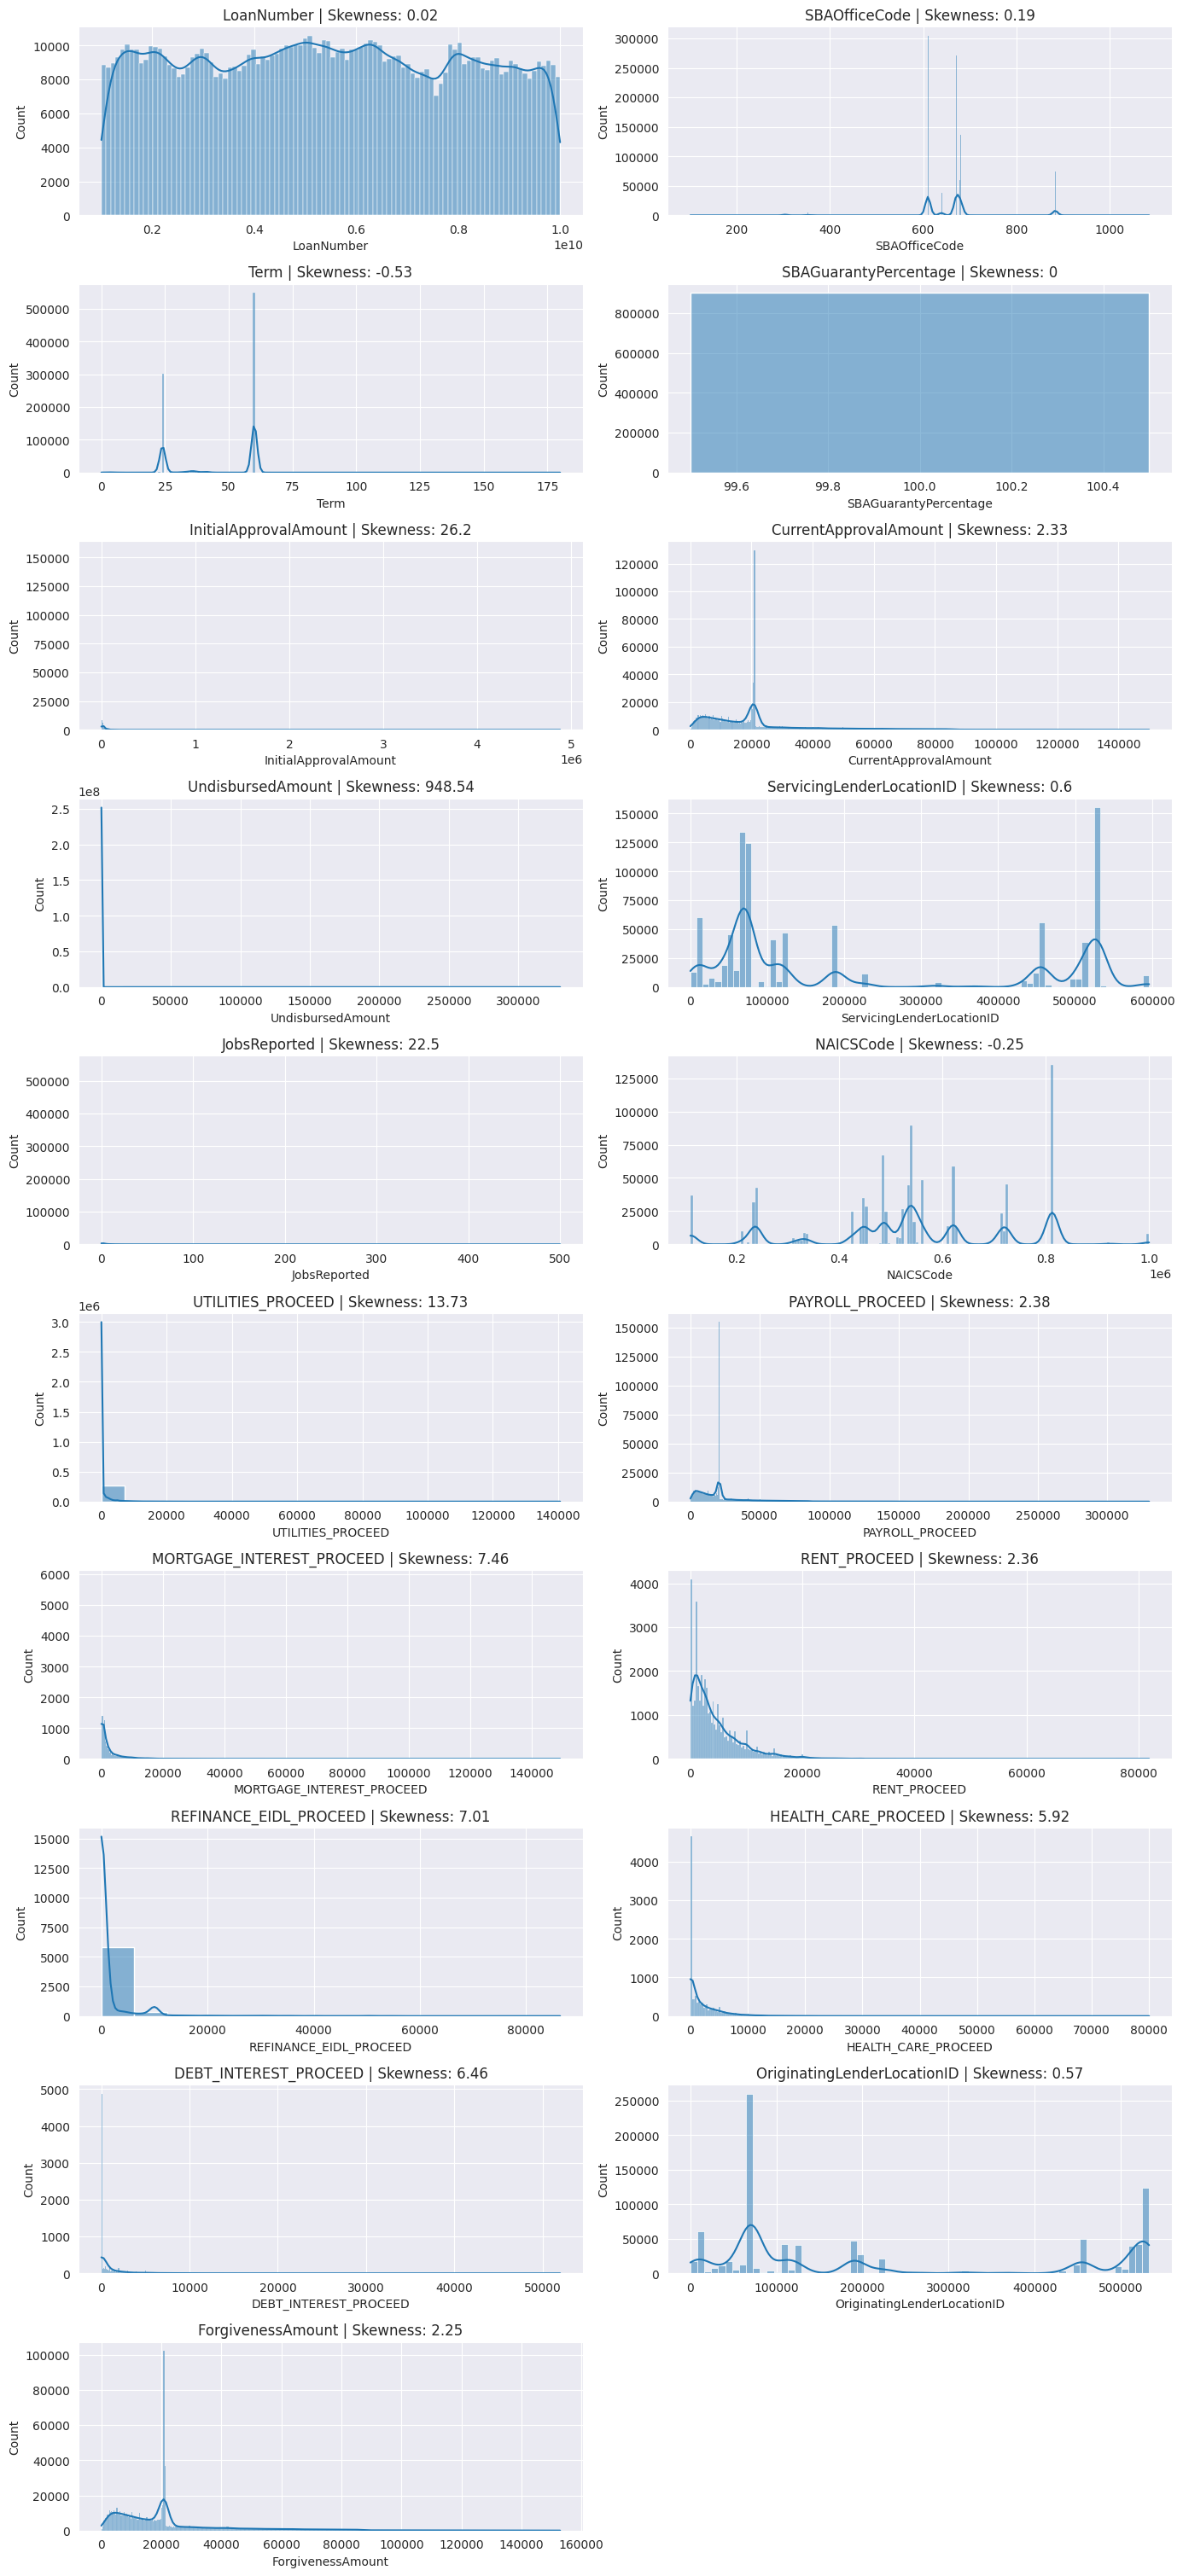

In [ ]:
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

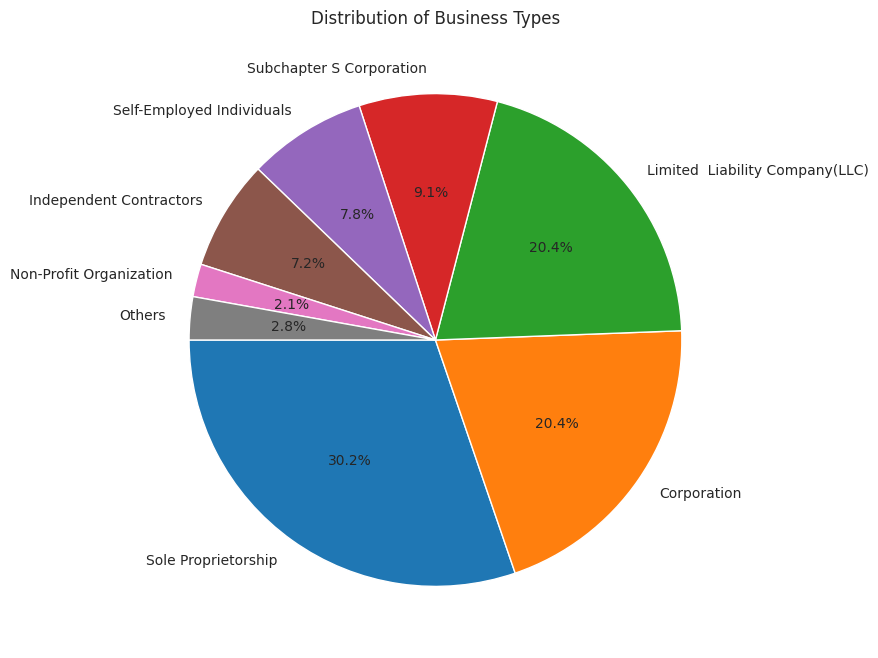

In [ ]:
# Bar Plot for Categorical Columns

# Calculate the percentage of each business type
business_type_count = pop['BusinessType'].value_counts()
business_type_percentage = business_type_count / business_type_count.sum() * 100

# Separate business types into those with >=2% and those with <2%
threshold = 2
large_categories = business_type_percentage[business_type_percentage >= threshold].index
small_categories = business_type_percentage[business_type_percentage < threshold].index

# Create a combined series for plotting
combined_business_type_count = business_type_count.copy()
combined_business_type_count['Others'] = combined_business_type_count[small_categories].sum()
combined_business_type_count = combined_business_type_count.drop(small_categories)

# Plot the distribution of combined BusinessType as a pie chart
plt.figure(figsize=(12, 8))
combined_business_type_count.plot.pie(autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Business Types')
plt.ylabel('')  # Hide the y-label for a cleaner look

plt.show()

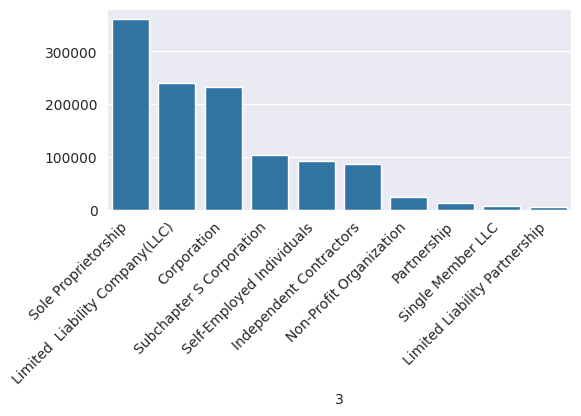

In [ ]:
industry_counts = combined_df['BusinessType'].value_counts().head(10)
sns.barplot(x=industry_counts.index, y=industry_counts.values)
plt.xticks(rotation=90)
plt.xlabel(3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad =3.0)
plt.show()

<ipython-input-31-d87bf7684fba>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Count', y='BorrowerState', data=state_counts, palette=palette, orient='h')


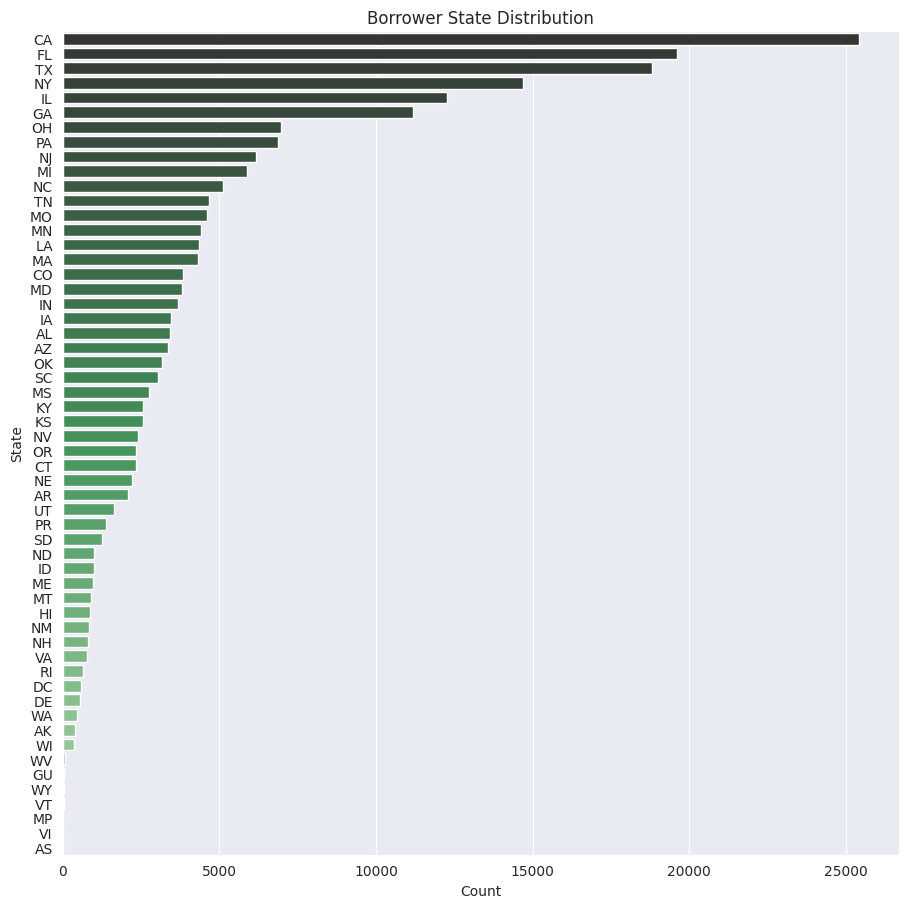

In [ ]:
state_counts =pop_sample['BorrowerState'].value_counts().reset_index()
state_counts.columns = ['BorrowerState', 'Count']

# Generate a color palette with the same number of colors as the number of states
palette = sns.color_palette("Greens_d", len(state_counts))

# Sort the palette based on the count
palette = palette[::-1]

# Create the barplot with custom colors
plt.figure(figsize=(10, 10))
bar_plot = sns.barplot(x='Count', y='BorrowerState', data=state_counts, palette=palette, orient='h')

# Add title and labels
plt.title('Borrower State Distribution')
plt.xlabel('Count')
plt.ylabel('State')

# Show plot
plt.tight_layout(pad=4.0)
plt.show()

# Merge columns

In [ ]:
job_data[['statefips']]

,statefips
0,1
1,2
2,4
3,5
4,6
...,...
11674,51
11675,53
11676,54
11677,55


In [ ]:
fips_to_states = {
     1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA',
    8: 'CO', 9: 'CT', 10: 'DE', 11: 'DC',
    12: 'FL', 13: 'GA', 15: 'HI', 16: 'ID', 17: 'IL',
    18: 'IN', 19: 'IA', 20: 'KS', 21: 'KY', 22: 'LA',
    23: 'ME', 24: 'MD', 25: 'MA', 26: 'MI', 27: 'MN',
    28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV',
    33: 'NH', 34: 'NJ', 35: 'NM', 36: 'NY',
    37: 'NC', 38: 'ND', 39: 'OH', 40: 'OK', 41: 'OR',
    42: 'PA', 44: 'RI', 45: 'SC', 46: 'SD',
    47: 'TN', 48: 'TX', 49: 'UT', 50: 'VT', 51: 'VA',
    53: 'WA', 54: 'WV', 55: 'WI', 56: 'WY'}
job_data['state'] = job_data['statefips'].map(fips_to_states)
df_population['STATE'] = df_population['STATE'].astype(int)
df_population['state'] = df_population['STATE'].map(fips_to_states)
pop_sample['state'] = pop_sample['BorrowerState']

In [ ]:
job_data = job_data[['year', 'month', 'day_endofweek', 'statefips','bg_posts','state']]

In [ ]:
df_population.isna().sum()

STATE              0
POPESTIMATE2020    0
state              0
dtype: int64

In [ ]:
merged_data = pd.merge(pop_sample, df_population, left_on='BorrowerState', right_on='state', how='inner')

In [ ]:
merged_data.head()

,DateApproved,BorrowerState,InitialApprovalAmount,ServicingLenderState,JobsReported,CurrentApprovalAmount,BusinessType,Race,Ethnicity,Gender,Veteran,state_x,STATE,POPESTIMATE2020,state_y
0,2020-06-09,GA,11600.0,VA,1.0,11600.0,Limited Liability Company(LLC),Unanswered,Unknown/NotStated,Unanswered,Unanswered,GA,13,10732390,GA
1,2020-06-09,GA,11600.0,VA,1.0,11600.0,Limited Liability Company(LLC),Unanswered,Unknown/NotStated,Unanswered,Unanswered,GA,13,18376,GA
2,2020-06-09,GA,11600.0,VA,1.0,11600.0,Limited Liability Company(LLC),Unanswered,Unknown/NotStated,Unanswered,Unanswered,GA,13,8308,GA
3,2020-06-09,GA,11600.0,VA,1.0,11600.0,Limited Liability Company(LLC),Unanswered,Unknown/NotStated,Unanswered,Unanswered,GA,13,11112,GA
4,2020-06-09,GA,11600.0,VA,1.0,11600.0,Limited Liability Company(LLC),Unanswered,Unknown/NotStated,Unanswered,Unanswered,GA,13,2852,GA
